### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [26]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks

In [27]:
def hough_cannoncical(img: np.ndarray, a_min: float, a_max: float, a_step: float, b_min: float, b_max: float, b_step: float) -> np.ndarray:
    A = np.arange(start=a_min, stop=a_max, step=a_step)
    B = np.arange(start=b_min, stop=b_max, step=b_step)
    H_ab = np.zeros(shape=(A.shape[0], B.shape[0]))
    n,m = img.shape
    for i in range(n):
        for j in range(m):
            if img[i, j] > 0:
                for a_idx in range(len(A)):
                    b_v = j - A[a_idx] * i
                    b_idx = np.argmin(np.abs(B - b_v))
                    if b_v >= b_min and b_v <= b_max:
                        H_ab[a_idx, b_idx] = H_ab[a_idx, b_idx] + 1
    return H_ab

In [28]:
def img_and_hough(img: np.ndarray, a_min: float, a_max: float, a_step: float, b_min: float, b_max: float, b_step: float):
    H_ab = hough_cannoncical(img, a_min, a_max, a_step, b_min, b_max, b_step)

    fig, ax = plt.subplots(1, 2, figsize=(12,6))

    for a in ax:
        a.axis('off')

    ax[0].imshow(img, 'gray')
    ax[0].set_title("Oryginalny obraz binarny")

    ax[1].imshow(H_ab, 'gray')
    ax[1].set_title("Obraz w przestrzeni ab")
    pass

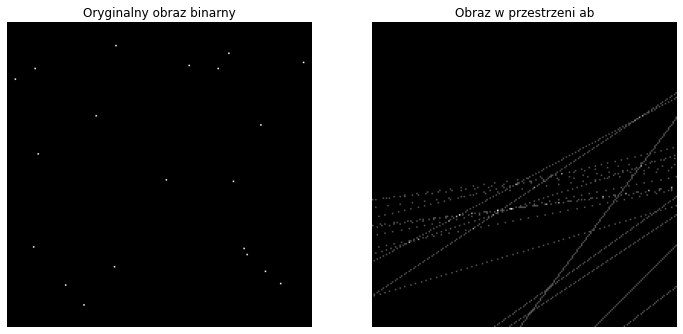

In [29]:
maxi = 200
n_pts = 20
xs = np.random.randint(1,maxi,size=(n_pts),dtype=int)
ys = np.random.randint(1,maxi,size=(n_pts),dtype=int)
size=(maxi,maxi)
rand_pts=np.zeros(shape=size)
n,m = size

for i in range(np.max(xs.shape)):
    x, y = xs[i], ys[i]
    if x < n and y < m:
        rand_pts[x,y] = 1
    else:
        continue

img_and_hough(rand_pts, -5, 5, 0.05, -100, 100, 1)

## Wnioski:
- może się ona nie sprawdzić dla większej ilości punktów
- ciężko zaobserwować maksymalne wartości w tej przestrzeni Hougha